<a href="https://colab.research.google.com/github/FinancialRADDeveloper/GoogleMusicDataAnalysis/blob/master/GoogleMusicAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pwd
!ls


/content
My%20Activity.json  sample_data


In [0]:
# Fetch a single file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/FinancialRADDeveloper/GoogleMusicDataAnalysis/master/takeout_data/My%20Activity/Google%20Play%20Music/My%20Activity.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4673k  100 4673k    0     0  12.5M      0 --:--:-- --:--:-- --:--:-- 12.5M


In [0]:

import pandas as pd


activity_data_frame = pd.read_json('My%20Activity.json')

print(len(activity_df))

activity_data_frame.head 


21287


<bound method NDFrame.head of                                         description  ...                                           titleUrl
0                     Slovak Philharmonic Orchestra  ...                                                NaN
1                     Slovak Philharmonic Orchestra  ...                                                NaN
2                                      David Guetta  ...                                                NaN
3      David Guetta & Cedric Gervais & Chris Willis  ...                                                NaN
4      David Guetta & Cedric Gervais & Chris Willis  ...                                                NaN
5                                 R3HAB & Icona Pop  ...                                                NaN
6                                            Avicii  ...                                                NaN
7                                      David Guetta  ...                                                Na

In [0]:

activity_data_frame['activity_datetime'] = pd.to_datetime(activity_data_frame['time'])

activity_data_frame['hour'] = activity_data_frame['activity_datetime'].dt.hour

listened_to_dataframe = activity_data_frame[activity_data_frame['title'].str.contains("Listened to")]
skipped_tracks_dataframe = activity_data_frame[activity_data_frame['title'].str.contains("Skipped")]
searched_activity_dataframe = activity_data_frame[activity_data_frame['title'].str.contains("Searched")]

listening_freq_by_hour = listened_to_dataframe['hour'].value_counts()
skipped_freq_by_hour = skipped_tracks_dataframe['hour'].value_counts()
search_freq_by_hour = searched_activity_dataframe['hour'].value_counts()

daily_listening_stats = sorted(list(zip(listening_freq_by_hour.index.tolist(),listening_freq_by_hour.tolist())))
skipped_stats = sorted(list(zip(skipped_freq_by_hour.index.tolist(), skipped_freq_by_hour.tolist())))
search_stats = sorted(list(zip(search_freq_by_hour.index.tolist(), search_freq_by_hour.tolist())))

import matplotlib.pyplot as plt


plt.ion()

# plt.style.use('ggplot')

plt.bar([i[0] for i in daily_listening_stats], [j[1] for j in daily_listening_stats], color = 'blue')
plt.bar([i[0] for i in skipped_stats], [j[1] for j in skipped_stats], color='red')
plt.bar([i[0] for i in search_stats], [j[1] for j in search_stats], color='purple')
plt.xlabel('Hour of the Day')
plt.ylabel('Total tracks listened')

plt.show()

In [0]:


headers = list(listened_to_dataframe.columns)

unique_vals_for_each_column = dict()

a = (listened_to_dataframe.applymap(type) == list).all()

for column in headers:

    col_type = listened_to_dataframe[column].dtype

    if bool(a[column]) is True:
        print('Data in column {} is a list'.format(column))

        # we need to do something special to make this into a tuple
        unique_data = listened_to_dataframe[column].transform(tuple).unique()
        unique_vals_for_each_column[str(column)] = unique_data.tolist()
    else:
        print('Data in column {} is NOT a list'.format(column))
        try:
            unique_data = listened_to_dataframe[column].unique()
            unique_vals_for_each_column[str(column)] = unique_data.tolist()
        except Exception as ie:
            pass

    # unique_vals_for_each_column[str(column)] = unique_data.tolist()


unique_vals_for_each_column

In [45]:
listened_to_dataframe.columns

artists_listened_to = list(listened_to_dataframe.description)
print('Total artists listened to: {}'.format(len(artists_listened_to)))

count = listened_to_dataframe.description.value_counts() 
print('Value counts: {}'.format(len(count)))
# print(count) 


unique_artists_listened_to = list(listened_to_dataframe.description.unique())
print('Unique artists listened to: {}'.format(len(unique_artists_listened_to)))

sorted_list_of_artists = sorted(unique_artists_listened_to)

# sorted_list_of_artists

Total artists listened to: 18961
value counts: 2718
Unique artists listened to: 2718


Attempting to load JSON to DataFrame
test


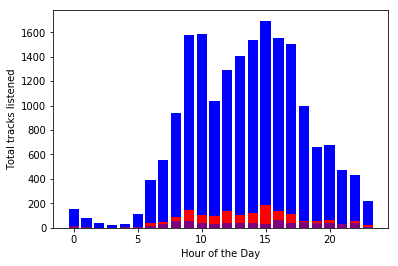

Data in column description is NOT a list
Data in column header is NOT a list
Data in column products is a list
Data in column subtitles is NOT a list
Data in column time is NOT a list
Data in column title is NOT a list
Data in column titleUrl is NOT a list
Data in column activity_datetime is NOT a list
Data in column hour is NOT a list
Finished load JSON to DataFrame


In [0]:
import pandas as pd


def main():

    try:
        print("Attempting to load JSON to DataFrame")
        gmusic_activity_df = load_json_to_dataframe()

        new_df = filter_out_skipped(gmusic_activity_df)

        calculate_hourly_activity(gmusic_activity_df)

        unique_vals = get_unique_vals_for_each_column(gmusic_activity_df)
        print("Finished load JSON to DataFrame")

    except Exception as e:

        print(e)


def load_json_to_dataframe():
  
    try:
  
      print('test')

      return pd.read_json('My%20Activity.json')
    
    except Exception as e:

      print(e)


def get_unique_vals_for_each_column(dataframe):

    headers = list(dataframe.columns)

    unique_vals_for_each_column = dict()

    a = (dataframe.applymap(type) == list).all()

    for column in headers:

        col_type = dataframe[column].dtype

        if bool(a[column]) is True:
            print('Data in column {} is a list'.format(column))

            # we need to do something special to make this into a tuple
            unique_data = dataframe[column].transform(tuple).unique()
            unique_vals_for_each_column[str(column)] = unique_data.tolist()
        else:
            print('Data in column {} is NOT a list'.format(column))
            try:
                unique_data = dataframe[column].unique()
                unique_vals_for_each_column[str(column)] = unique_data.tolist()
            except Exception as ie:
                pass

        # unique_vals_for_each_column[str(column)] = unique_data.tolist()


    return unique_vals_for_each_column


def filter_out_skipped(activity_data_frame):

    listened_to_dataframe = activity_data_frame[activity_data_frame['title'].str.contains("Listened to")]

    skipped_tracks_dataframe = activity_data_frame[activity_data_frame['title'].str.contains("Skipped")]

    searched_activity_dataframe = activity_data_frame[activity_data_frame['title'].str.contains("Searched")]

    other_activity_dataframe = activity_data_frame[~activity_data_frame['title'].str.contains("Listened to")]
    other_activity_dataframe = other_activity_dataframe[~other_activity_dataframe['title'].str.contains("Skipped")]

    return listened_to_dataframe

def calculate_hourly_activity(activity_data_frame):

    string_activity_dates = activity_data_frame['time'].tolist()

    # converted_dates = []

    # for i, elem in enumerate(string_activity_dates):
    #     converted_dates.append(parser.parse(elem))
    #     # elem = parser.parse(elem)
    #
    # activity_data_frame['datetime_time'] = converted_dates

    activity_data_frame['activity_datetime'] = pd.to_datetime(activity_data_frame['time'])

    activity_data_frame['hour'] = activity_data_frame['activity_datetime'].dt.hour

    listened_to_dataframe = activity_data_frame[activity_data_frame['title'].str.contains("Listened to")]
    skipped_tracks_dataframe = activity_data_frame[activity_data_frame['title'].str.contains("Skipped")]
    searched_activity_dataframe = activity_data_frame[activity_data_frame['title'].str.contains("Searched")]

    listening_freq_by_hour = listened_to_dataframe['hour'].value_counts()
    skipped_freq_by_hour = skipped_tracks_dataframe['hour'].value_counts()
    search_freq_by_hour = searched_activity_dataframe['hour'].value_counts()

    daily_listening_stats = sorted(list(zip(listening_freq_by_hour.index.tolist(),listening_freq_by_hour.tolist())))
    skipped_stats = sorted(list(zip(skipped_freq_by_hour.index.tolist(), skipped_freq_by_hour.tolist())))
    search_stats = sorted(list(zip(search_freq_by_hour.index.tolist(), search_freq_by_hour.tolist())))

    import matplotlib.pyplot as plt


    plt.ion()

    # plt.style.use('ggplot')

    plt.bar([i[0] for i in daily_listening_stats], [j[1] for j in daily_listening_stats], color = 'blue')
    plt.bar([i[0] for i in skipped_stats], [j[1] for j in skipped_stats], color='red')
    plt.bar([i[0] for i in search_stats], [j[1] for j in search_stats], color='purple')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Total tracks listened')

    plt.show()
#     plt.close()


    # first we need to convert the column into a date time
    # activity_data_frame['ActivityDateTime'] = pd.to_datetime(activity_data_frame['time'],
    #                                                        format='%Y-%m-%d %H:%M:%S-%Z',
    #                                                        errors='coerce')
    # then extract the hour from the date time
    # activity_data_frame['activity_hour'] = activity_data_frame['datetime_time']


    # then get the frequency of each hour

    # then I guess we want to feed this into some sort of Jupyter notebook

    pass





if __name__ == "__main__":
    main()

